Progetto di Banfi Michele 869294

# Chiarimenti
- [ ] Rendimento cumulato
- [ ] Mean o Last quando si fa il groupby => sempre last
- [ ] Rendimenti da usare durante tutta la durata del progetto.. log?
- [ ] "Relazione tra i diversi titoli" => matrice di cov() tra essi??
- [ ] Correlazione dei rendimenti => autocorrelazione => sistemerá il file
- [ ] Fama-French => guardare lezioni

# 1) Sommario dei dati utilizzati

Financials:
1. **JPM** JPMorgan Chase & Co. 
2. **BAC** Bank Of America Corp

Healtcare:
1. **JNJ** Johnson & Johnson
2. **PFE** Pfizer Inc.

Energy
1. **CVX** Chevron Corporation
2. **XOM** Exxon Mobil Corporation

Importiamo le librerie necessarie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

Scarichiamo i dati dei titoli selezionati, compresi tra le seguenti date: 30.11.2012 – 30.11.2022.

In [2]:
start = "2012-11-30"
end = "2022-11-30"

#Tech
NFLX = yf.download("NFLX", start, end)
META = yf.download("META", start, end)

#Financials
GS = yf.download("GS", start, end)
C = yf.download("C", start, end)

#Consumers
KO = yf.download("KO", start, end)
PEP = yf.download("PEP", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Per avere una priva vista dei dati utilizziamo il metodo `.describe()` che ci permette di avere una breve descrizione statistica

In [3]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,236.614745,240.260388,232.767693,236.612867,236.612867,1.276042e+07
std,175.488279,177.898493,172.820707,175.370038,175.370038,1.252818e+07
min,10.787143,11.672857,10.642857,10.857143,10.857143,1.144000e+06
25%,87.544289,88.879997,85.755714,87.879997,87.879997,5.454900e+06
50%,187.179993,189.940002,184.509995,187.759995,187.759995,9.234500e+06
75%,361.959991,367.329987,356.619995,361.809998,361.809998,1.612870e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.914458e+08


In [4]:
META.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,154.807823,156.751931,152.864188,154.840413,154.840413,3.001835e+07
std,84.635594,85.713111,83.590276,84.657774,84.657774,2.392035e+07
min,22.990000,23.090000,22.670000,22.900000,22.900000,5.913100e+06
25%,82.769997,83.500000,82.150002,82.750000,82.750000,1.598860e+07
50%,151.690002,153.309998,149.630005,151.380005,151.380005,2.263500e+07
75%,194.699997,197.389999,192.119995,194.470001,194.470001,3.476080e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,3.654579e+08


In [5]:
GS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,224.747727,227.051398,222.447477,224.773882,206.544203,3.138018e+06
std,69.273988,70.064910,68.386284,69.228880,72.981477,1.463516e+06
min,116.610001,117.169998,115.620003,116.570000,98.490280,4.677000e+05
25%,172.710007,174.630005,170.970001,172.600006,150.902481,2.212200e+06
50%,205.399994,207.429993,203.539993,205.690002,188.582855,2.790500e+06
75%,244.440002,246.199997,241.669998,244.300003,223.437561,3.625500e+06
max,423.119995,426.160004,413.760010,423.850006,410.787231,2.041010e+07


In [6]:
C.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,57.526202,58.118157,56.908244,57.506822,50.457641,2.057051e+07
std,10.828254,10.862493,10.789567,10.817527,10.577107,9.417357e+06
min,34.130001,34.509998,32.000000,34.220001,28.377237,4.576200e+06
25%,48.880001,49.450001,48.360001,48.830002,41.539730,1.408430e+07
50%,54.430000,54.900002,53.810001,54.330002,48.226738,1.835730e+07
75%,67.540001,68.180000,66.790001,67.480003,59.763664,2.460000e+07
max,81.959999,83.110001,80.970001,81.910004,75.656410,1.126010e+08


In [7]:
KO.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,46.926651,47.245070,46.603695,46.929503,40.544587,1.431968e+07
std,6.939751,7.013666,6.860048,6.941302,9.661581,6.087985e+06
min,35.880001,36.279999,35.580002,35.970001,26.258827,2.996300e+06
25%,41.660000,41.880001,41.439999,41.660000,32.488258,1.041560e+07
50%,45.139999,45.439999,44.840000,45.150002,38.077286,1.298670e+07
75%,51.959999,52.189999,51.580002,51.980000,47.609936,1.649160e+07
max,67.000000,67.199997,65.720001,66.209999,64.799698,6.784570e+07


In [8]:
PEP.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,116.969241,117.792304,116.131009,116.991943,103.293545,4.703236e+06
std,27.615090,27.879218,27.294506,27.594900,32.911508,1.837408e+06
min,67.779999,68.449997,67.389999,68.019997,51.033348,8.833000e+05
25%,96.580002,97.209999,96.080002,96.500000,77.057747,3.545700e+06
50%,111.680000,112.330002,110.910004,111.639999,96.272530,4.359500e+06
75%,136.479996,137.380005,135.259995,136.320007,125.871315,5.424100e+06
max,185.809998,186.619995,184.500000,185.080002,183.932663,2.755970e+07


Uniamo i dati in un unico dataframe cosi da poter studiare al meglio l'andamento storico dei prezzi. Uniamo secondo l'`Adj Close` che é il prezzo di chiusura giornaliero aggiustato con i dividendi

In [9]:
market = pd.concat([NFLX['Adj Close'], META['Adj Close'], GS['Adj Close'], C['Adj Close'], KO['Adj Close'], PEP['Adj Close']], axis=1)
market.columns = ['NFLX', 'META', 'GS', 'C', 'KO', 'PEP']

In [10]:
ciao = market.head()
print(market.head().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &       NFLX &       META &          GS &          C &         KO &        PEP \\
Date       &            &            &             &            &            &            \\
\midrule
2012-11-30 &  11.672857 &  28.000000 &   99.521072 &  28.667473 &  27.682375 &  52.271538 \\
2012-12-03 &  10.857143 &  27.040001 &  100.036469 &  28.377237 &  27.288151 &  52.018394 \\
2012-12-04 &  12.378571 &  27.459999 &   98.498741 &  28.435293 &  27.120249 &  52.010948 \\
2012-12-05 &  11.910000 &  27.709999 &   98.963425 &  30.234791 &  27.237047 &  52.301308 \\
2012-12-06 &  12.310000 &  26.969999 &   99.022583 &  30.699167 &  27.288151 &  52.533901 \\
\bottomrule
\end{tabular}



Ora possiamo procede con il plot dei dati

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

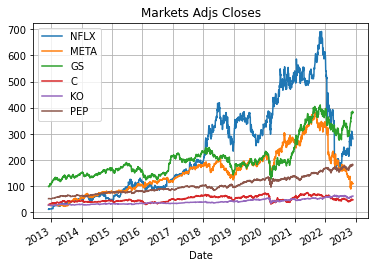

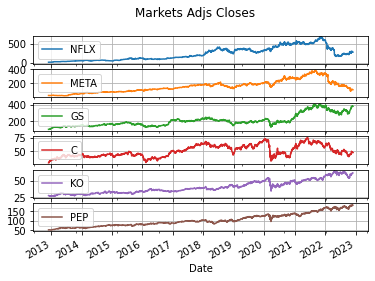

In [11]:
market.plot(grid=True, title="Markets Adjs Closes")
market.plot(grid=True, title="Markets Adjs Closes", subplots=True)

# 2) Statistiche descrittive

#### Rendimenti

Calcolo dei dati annui

In [12]:
NFLXy = NFLX.groupby(pd.Grouper(freq='Y')).last()
METAy = META.groupby(pd.Grouper(freq='Y')).last()
GSy = GS.groupby(pd.Grouper(freq='Y')).last()
Cy = C.groupby(pd.Grouper(freq='Y')).last()
KOy = KO.groupby(pd.Grouper(freq='Y')).last()
PEPy = PEP.groupby(pd.Grouper(freq='Y')).last()
marketY = pd.concat([NFLXy['Adj Close'], METAy['Adj Close'], GSy['Adj Close'], Cy['Adj Close'], KOy['Adj Close'], PEPy['Adj Close']], axis=1)
marketY.columns = ['NFLX', 'META', 'GS', 'C', 'KO', 'PEP']

In [13]:
marketY.head(14)

,NFLX,META,GS,C,KO,PEP
Date,,,,,,
2012-12-31,13.227143,26.620001,107.775764,32.805489,26.463236,51.340965
2013-12-31,52.595715,54.650002,151.741379,43.249382,31.023649,63.995510
2014-12-31,48.801430,78.019997,168.107147,44.945549,32.657379,75.044876
2015-12-31,114.379997,104.660004,158.374420,43.111053,34.335922,81.610199
2016-12-31,123.800003,115.050003,213.683670,49.967144,34.213310,87.972450
2017-12-31,191.960007,176.460007,230.210098,63.471573,39.133896,103.647499
2018-12-31,267.660004,131.089996,153.031616,45.390884,41.784626,98.659065
2019-12-31,323.570007,205.250000,214.977249,71.636078,50.392021,125.667915
2020-12-31,540.729980,273.160004,252.498810,57.520634,51.636265,140.335495


Rendimenti composti e cumulati annui

In [14]:
#Rendimento cumulato annuale
marketY2 = marketY.pct_change(1)
marketY2 = marketY2.dropna()
marketY3 = np.cumprod(marketY2 + 1)

#Rendimento composto annuale
#+(100/80)^(1/3) - 1

rcoNFLXy = ((marketY['NFLX'][-1]/marketY['NFLX'][0])**(1/marketY['NFLX'].count()) - 1) * 100
rcoMETAy = ((marketY['META'][-1]/marketY['META'][0])**(1/marketY['META'].count()) - 1) * 100
rcoGSy = ((marketY['GS'][-1]/marketY['GS'][0])**(1/marketY['GS'].count()) - 1) * 100
rcoCy = ((marketY['C'][-1]/marketY['C'][0])**(1/marketY['C'].count()) - 1) * 100
rcoKOy = ((marketY['KO'][-1]/marketY['KO'][0])**(1/marketY['KO'].count()) - 1) * 100
rcoPEPy = ((marketY['PEP'][-1]/marketY['PEP'][0])**(1/marketY['PEP'].count()) - 1) * 100


Rendimenti semplici e logaritmici

In [15]:
#Rendimento semplice
rsNFLX = NFLX['Adj Close'] / NFLX['Adj Close'].shift(1)
rsMETA = META['Adj Close'] / META['Adj Close'].shift(1)
rsGS = GS['Adj Close'] / GS['Adj Close'].shift(1)
rsC = C['Adj Close'] / C['Adj Close'].shift(1)
rsKO = KO['Adj Close'] / KO['Adj Close'].shift(1)
rsPEP = PEP['Adj Close'] / PEP['Adj Close'].shift(1)
rsMarket = pd.concat([rsNFLX, rsMETA, rsGS, rsC, rsKO, rsPEP], axis=1)
rsMarket.dropna()
rsMarket.columns = ['NFLX', 'META', 'GS', 'C', 'KO', 'PEP']
#Rendimento logaritmico
rlNFLX = np.log(NFLX['Adj Close'] / NFLX['Adj Close'].shift(1))
rlMETA = np.log(META['Adj Close'] / META['Adj Close'].shift(1))
rlGS = np.log(GS['Adj Close'] / GS['Adj Close'].shift(1))
rlC = np.log(C['Adj Close'] / C['Adj Close'].shift(1))
rlKO = np.log(KO['Adj Close'] / KO['Adj Close'].shift(1))
rlPEP = np.log(PEP['Adj Close'] / PEP['Adj Close'].shift(1))
rlMarket = pd.concat([rlNFLX, rlMETA, rlGS, rlC, rlKO, rlPEP], axis=1)
rlMarket.dropna()
rlMarket.columns = ['NFLX', 'META', 'GS', 'C', 'KO', 'PEP']


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

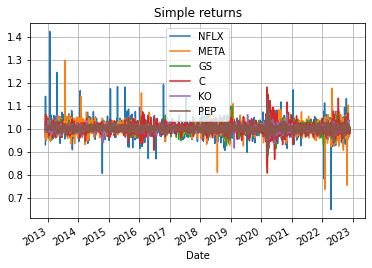

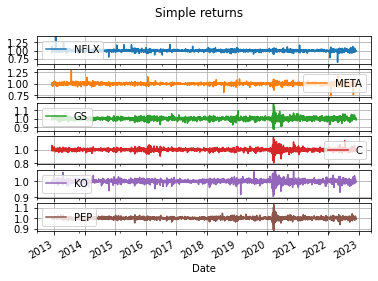

In [16]:
#Plot market simple returns
rsMarket.plot(grid=True, title="Simple returns")
rsMarket.plot(grid=True, title="Simple returns", subplots=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

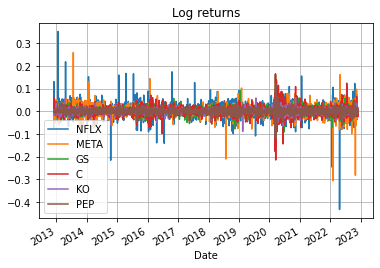

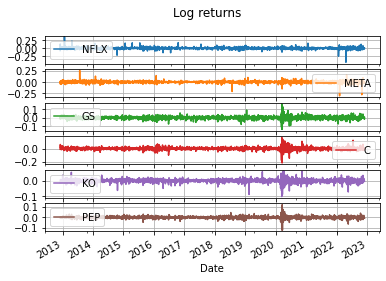

In [17]:
#Plot market Logarithmic returns
rlMarket.plot(grid=True, title="Log returns")
rlMarket.plot(grid=True, title="Log returns", subplots=True)

Ora plottiamo i rendimenti con istogrammi per vedere meglio che distribuzione hanno

Text(0.5, 1.0, 'PEP Logarithmic returns histogram')

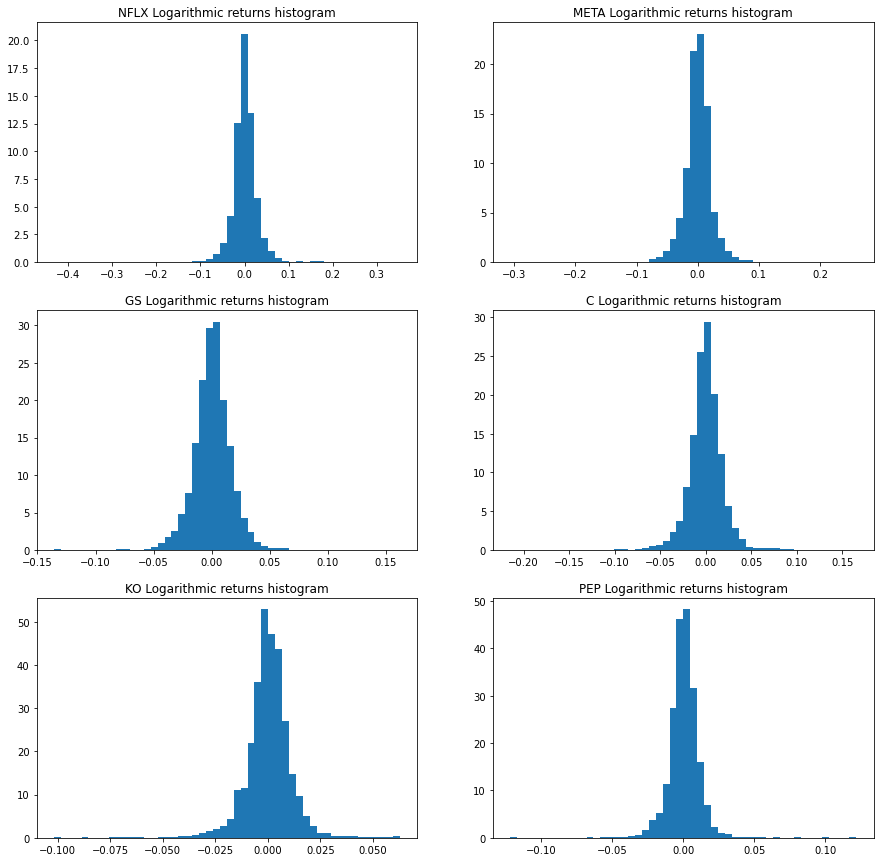

In [18]:
#Rendimenti logaritmici
plt.figure(figsize=(15, 15))
plt.subplot(321)
plt.hist(rlNFLX, density=True, bins=50)
plt.title('NFLX Logarithmic returns histogram')

plt.subplot(322)
plt.hist(rlMETA, density=True, bins=50)
plt.title('META Logarithmic returns histogram')

plt.subplot(323)
plt.hist(rlGS, density=True, bins=50)
plt.title('GS Logarithmic returns histogram')

plt.subplot(324)
plt.hist(rlC, density=True, bins=50)
plt.title('C Logarithmic returns histogram')

plt.subplot(325)
plt.hist(rlKO, density=True, bins=50)
plt.title('KO Logarithmic returns histogram')

plt.subplot(326)
plt.hist(rlPEP, density=True, bins=50)
plt.title('PEP Logarithmic returns histogram')


In [19]:
import statsmodels.api as sm

Ora plottiamo per ogni rendimento di ogni azione:
- istogramma 
- boxplot 
- qq plot
- kernel density

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<AxesSubplot:title={'center':'NFLX Kernel density'}, ylabel='Density'>

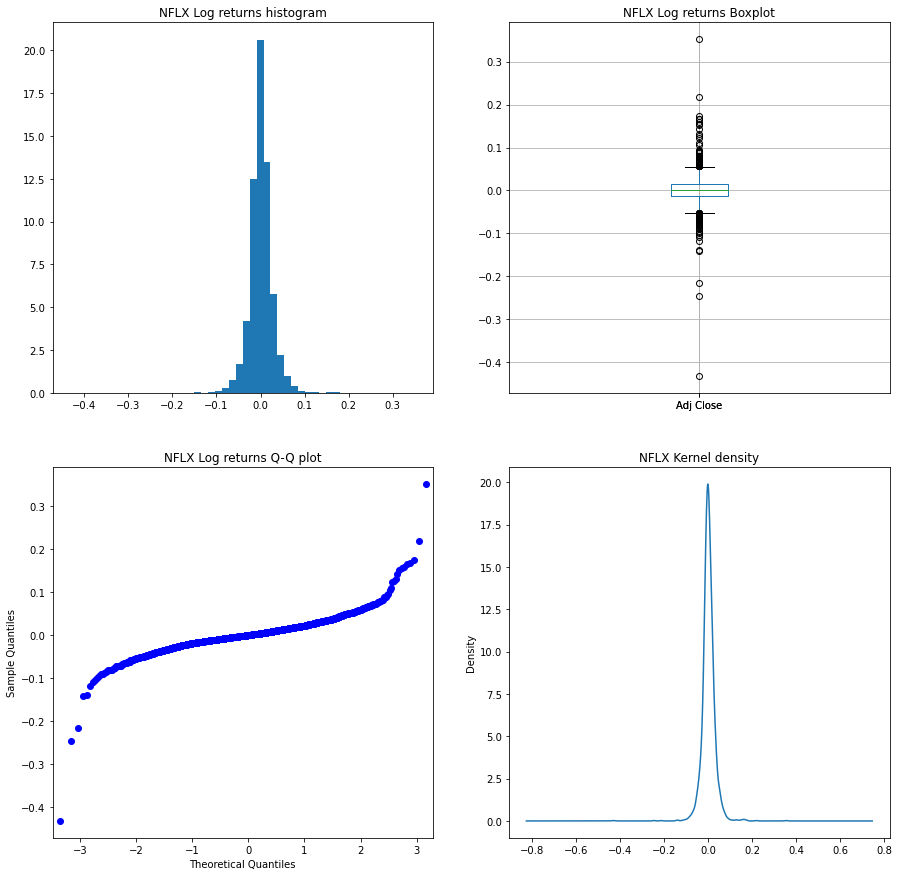

In [20]:
#NFLX
fig = plt.figure(figsize=(15, 15))

ax=fig.add_subplot(221)
plt.hist(rlNFLX, density=True, bins=50)
plt.title('NFLX Log returns histogram')

ax=fig.add_subplot(222)
plt.boxplot(rlNFLX)
plt.title('NFLX Log returns Boxplot')
rlNFLX.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlNFLX, line='s', ax=ax)
plt.title('NFLX Log returns Q-Q plot')

ax=fig.add_subplot(224)
plt.title('NFLX Kernel density')
rlNFLX.plot.density()


/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<AxesSubplot:title={'center':'META Kernel density'}, ylabel='Density'>

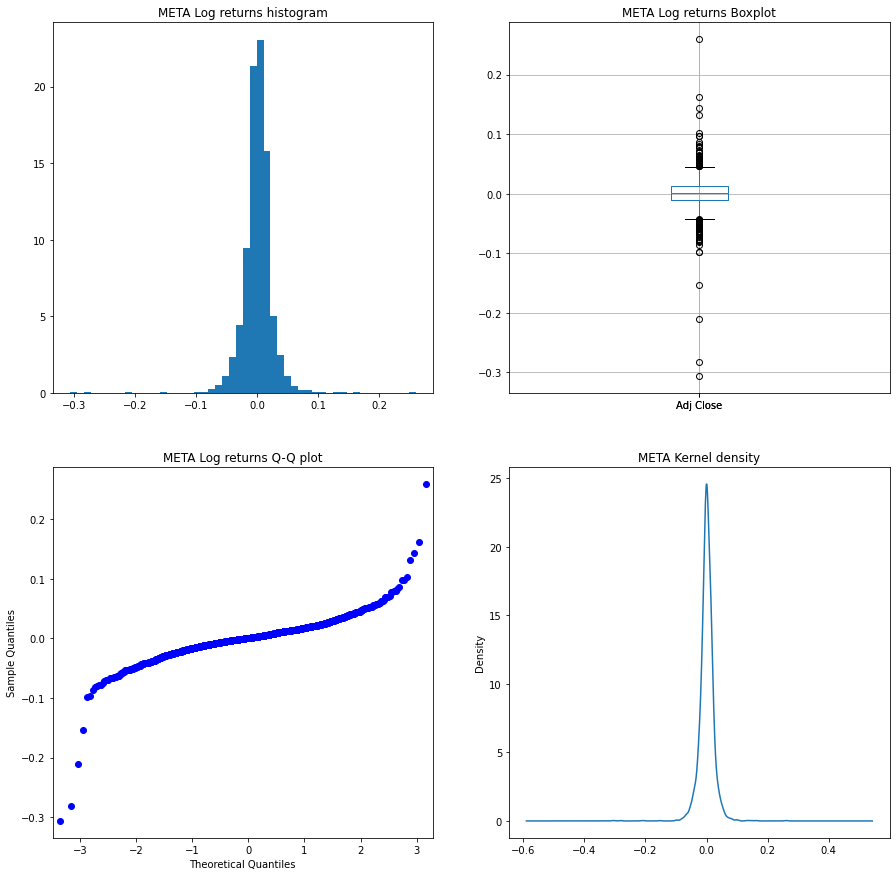

In [21]:
#META
fig = plt.figure(figsize=(15, 15))

ax=fig.add_subplot(221)
plt.hist(rlMETA, density=True, bins=50)
plt.title('META Log returns histogram')

ax=fig.add_subplot(222)
plt.boxplot(rlMETA)
plt.title('META Log returns Boxplot')
rlMETA.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlMETA, line='s', ax=ax)
plt.title('META Log returns Q-Q plot')

ax=fig.add_subplot(224)
plt.title('META Kernel density')
rlMETA.plot.density()

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<AxesSubplot:title={'center':'GS Kernel density'}, ylabel='Density'>

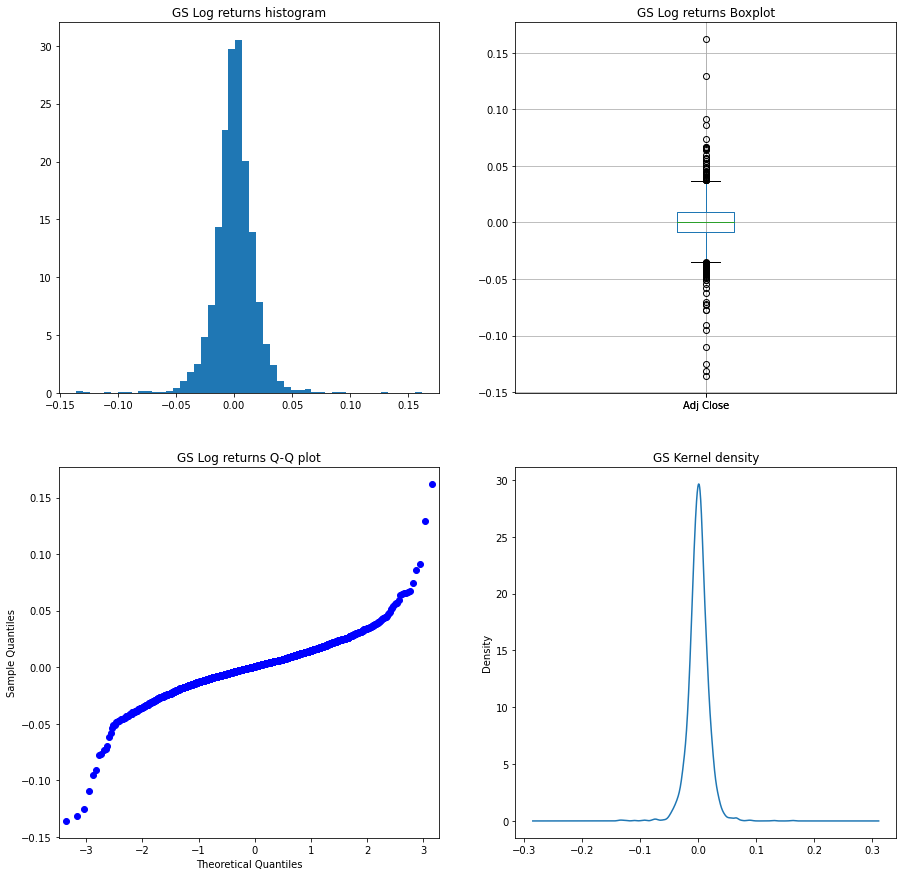

In [22]:
#GS
fig = plt.figure(figsize=(15, 15))

ax=fig.add_subplot(221)
plt.hist(rlGS, density=True, bins=50)
plt.title('GS Log returns histogram')

ax=fig.add_subplot(222)
plt.boxplot(rlGS)
plt.title('GS Log returns Boxplot')
rlGS.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlGS, line='s', ax=ax)
plt.title('GS Log returns Q-Q plot')

ax=fig.add_subplot(224)
plt.title('GS Kernel density')
rlGS.plot.density()

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<AxesSubplot:title={'center':'C Kernel density'}, ylabel='Density'>

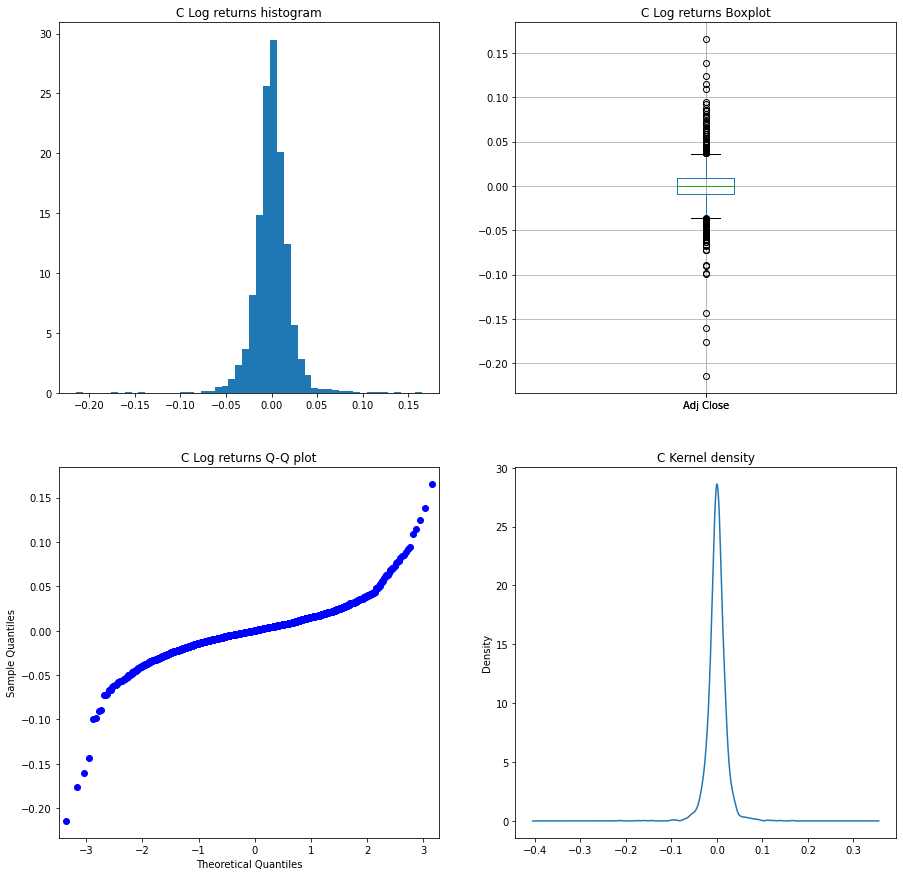

In [23]:
#C
fig = plt.figure(figsize=(15, 15))

ax=fig.add_subplot(221)
plt.hist(rlC, density=True, bins=50)
plt.title('C Log returns histogram')

ax=fig.add_subplot(222)
plt.boxplot(rlC)
plt.title('C Log returns Boxplot')
rlC.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlC, line='s', ax=ax)
plt.title('C Log returns Q-Q plot')

ax=fig.add_subplot(224)
plt.title('C Kernel density')
rlC.plot.density()

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<AxesSubplot:title={'center':'KO Kernel density'}, ylabel='Density'>

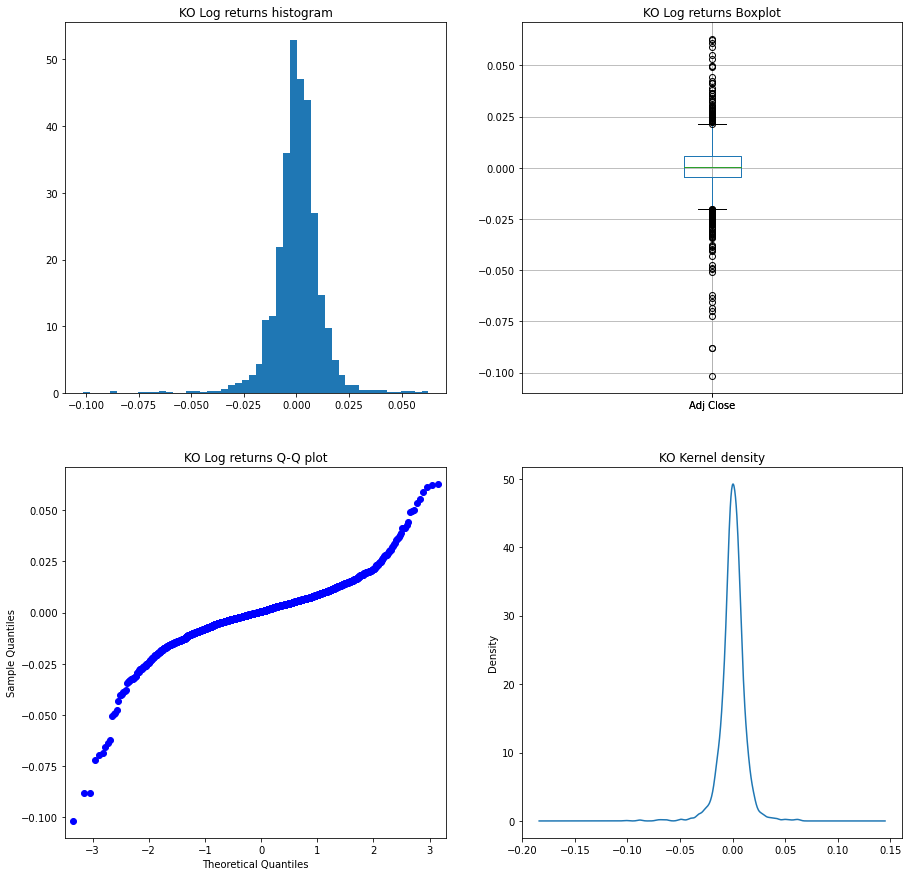

In [24]:
#KO
fig = plt.figure(figsize=(15, 15))

ax=fig.add_subplot(221)
plt.hist(rlKO, density=True, bins=50)
plt.title('KO Log returns histogram')

ax=fig.add_subplot(222)
plt.boxplot(rlKO)
plt.title('KO Log returns Boxplot')
rlKO.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlKO, line='s', ax=ax)
plt.title('KO Log returns Q-Q plot')

ax=fig.add_subplot(224)
plt.title('KO Kernel density')
rlKO.plot.density()

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<AxesSubplot:title={'center':'PEP Kernel density'}, ylabel='Density'>

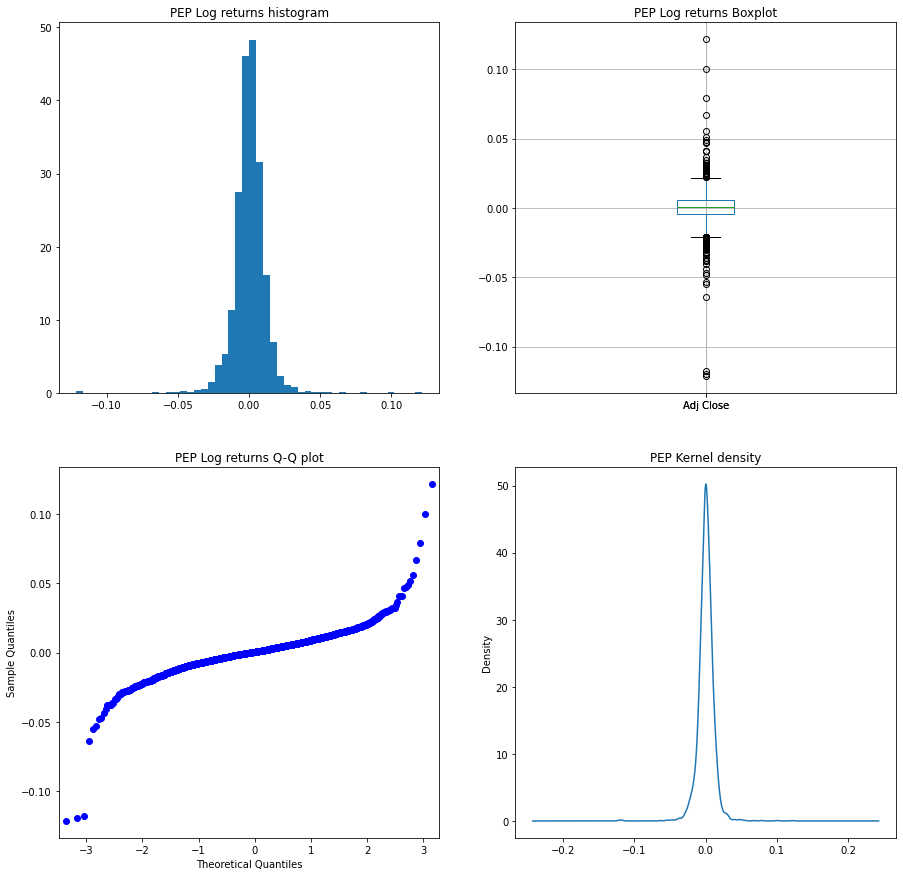

In [25]:
#PEP   
fig = plt.figure(figsize=(15, 15))

ax=fig.add_subplot(221)
plt.hist(rlPEP, density=True, bins=50)
plt.title('PEP Log returns histogram')

ax=fig.add_subplot(222)
plt.boxplot(rlPEP)
plt.title('PEP Log returns Boxplot')
rlPEP.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlPEP, line='s', ax=ax)
plt.title('PEP Log returns Q-Q plot')

ax=fig.add_subplot(224)
plt.title('PEP Kernel density')
rlPEP.plot.density()

Ora procediamo con il calcolo delle statistiche descrittive:
- Media
- Varianza
- Deviazione standard
- Asimmetria
- Curtosi

In [26]:
#NFLX
meanNFLX = round(rlNFLX.mean(), 4)
varNFLX = round(rlNFLX.var(), 4)
stdNFLX = round(rlNFLX.std(), 4)
skewNFLX = round(rlNFLX.skew(), 4)
kurtNFLX = round(rlNFLX.kurtosis(), 4)
print(meanNFLX, varNFLX, stdNFLX, skewNFLX, kurtNFLX)

0.0013 0.0009 0.03 -0.4118 31.0142


In [27]:
#META
meanMETA = round(rlMETA.mean(), 4)
varMETA = round(rlMETA.var(), 4)
stdMETA = round(rlMETA.std(), 4)
skewMETA = round(rlMETA.skew(), 4)
kurtMETA = round(rlMETA.kurtosis(), 4)
print(meanMETA, varMETA, stdMETA, skewMETA, kurtMETA)

0.0005 0.0006 0.0241 -1.1173 27.8449


In [28]:
#GS
meanGS = round(rlGS.mean(), 4)
varGS = round(rlGS.var(), 4)
stdGS = round(rlGS.std(), 4)
skewGS = round(rlGS.skew(), 4)
kurtGS = round(rlGS.kurtosis(), 4)
print(meanGS, varGS, stdGS, skewGS, kurtGS)

0.0005 0.0003 0.0176 -0.1998 9.8418


In [29]:
#C
meanC = round(rlC.mean(), 4)
varC = round(rlC.var(), 4)
stdC = round(rlC.std(), 4)
skewC = round(rlC.skew(), 4)
kurtC = round(rlC.kurtosis(), 4)
print(meanC, varC, stdC, skewC, kurtC)

0.0002 0.0004 0.0203 -0.4764 14.9718


In [30]:
#KO
meanKO = round(rlKO.mean(), 4)
varKO = round(rlKO.var(), 4)
stdKO = round(rlKO.std(), 4)
skewKO = round(rlKO.skew(), 4)
kurtKO = round(rlKO.kurtosis(), 4)
print(meanKO, varKO, stdKO, skewKO, kurtKO)

0.0003 0.0001 0.0115 -0.8931 10.6779


In [31]:
#PEP
meanPEP = round(rlPEP.mean(), 4)
varPEP = round(rlPEP.var(), 4)
stdPEP = round(rlPEP.std(), 4)
skewPEP = round(rlPEP.skew(), 4)
kurtPEP = round(rlPEP.kurtosis(), 4)
print(meanPEP, varPEP, stdPEP, skewPEP, kurtPEP)

0.0005 0.0001 0.0115 -0.5869 23.735


In [32]:
univariazione = pd.DataFrame([[meanNFLX, meanMETA, meanGS, meanC, meanKO, meanPEP], [varNFLX, varMETA, varGS, varC, varKO, varPEP], [stdNFLX, stdMETA, stdGS, stdC, stdKO, stdPEP], [skewNFLX, skewMETA, skewGS, skewC, skewKO, skewPEP], [kurtNFLX, kurtMETA, kurtGS, kurtC, kurtKO, kurtPEP]],
index=['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'], columns=['NFLX', 'META', 'GS', 'C', 'KO', 'PEP'])
print(univariazione.to_latex())


\begin{tabular}{lrrrrrr}
\toprule
{} &     NFLX &     META &      GS &        C &       KO &      PEP \\
\midrule
Mean               &   0.0013 &   0.0005 &  0.0005 &   0.0002 &   0.0003 &   0.0005 \\
Variance           &   0.0009 &   0.0006 &  0.0003 &   0.0004 &   0.0001 &   0.0001 \\
Standard Deviation &   0.0300 &   0.0241 &  0.0176 &   0.0203 &   0.0115 &   0.0115 \\
Skewness           &  -0.4118 &  -1.1173 & -0.1998 &  -0.4764 &  -0.8931 &  -0.5869 \\
Kurtosis           &  31.0142 &  27.8449 &  9.8418 &  14.9718 &  10.6779 &  23.7350 \\
\bottomrule
\end{tabular}



Ora procediamo al calcolo della matrice di varianza/covarianza dei rendimenti tra i diversi titoli

In [33]:
#Covariance Matrix
covariance = rlMarket.cov().iloc[0,1]
covarianceMatrix  = rlMarket.cov()
rlNFLX.head()

Date
2012-11-30         NaN
2012-12-03   -0.072443
2012-12-04    0.131144
2012-12-05   -0.038588
2012-12-06    0.033034
Name: Adj Close, dtype: float64

Creiamo la matrice di correlazione

In [34]:
import seaborn as sns

<AxesSubplot:title={'center':'Matrice di correlazione'}>

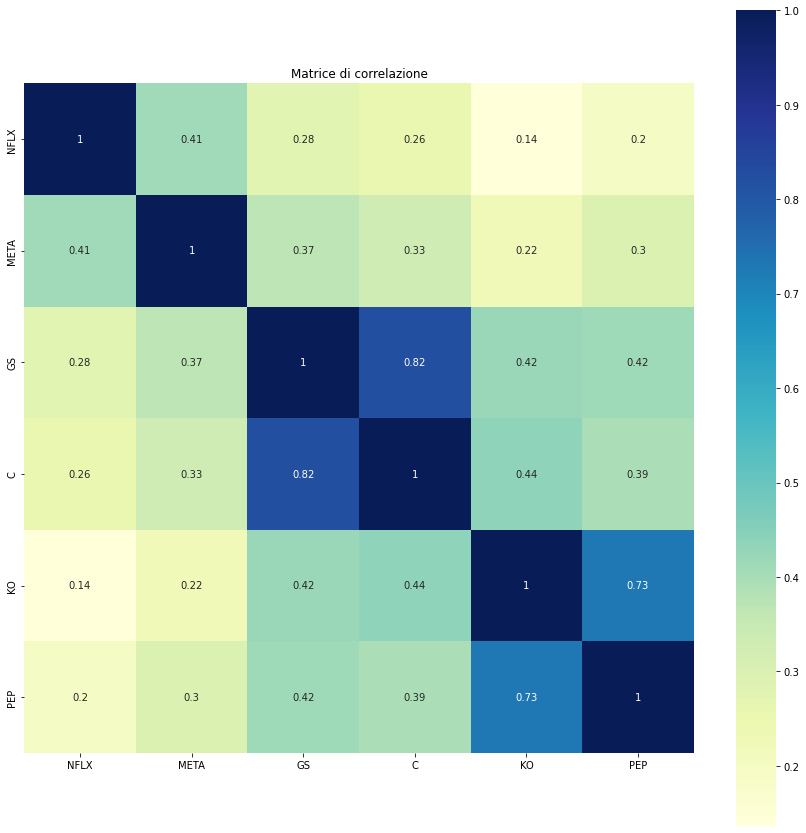

In [35]:
correlation = rlMarket.corr()
plt.figure(figsize=(15,15))
plt.title('Matrice di correlazione')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='YlGnBu')

Ora invece calcoliamo lo scatter plot tra i diversi titoli

<Figure size 1080x1080 with 0 Axes>

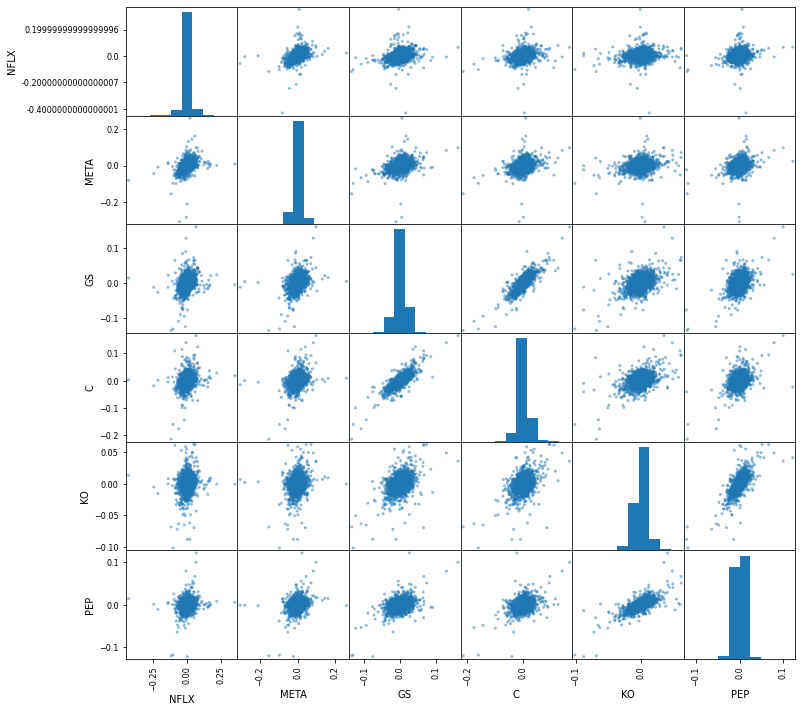

In [36]:
plt.figure(figsize=(15,15))
pd.plotting.scatter_matrix(rlMarket, figsize=(12, 12))
plt.show()

# 3) Analisi di previsione

Prevediamo i prezzi di GS

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [38]:

NFLXm = NFLX.groupby(pd.Grouper(freq='M')).last()
METAm = META.groupby(pd.Grouper(freq='M')).last()
GSm = GS.groupby(pd.Grouper(freq='M')).last()
Cm = C.groupby(pd.Grouper(freq='M')).last()
KOm = KO.groupby(pd.Grouper(freq='M')).last()
PEPm = PEP.groupby(pd.Grouper(freq='M')).last()

In [87]:
print(NFLX.shape)
print(METAm.shape)

(2517, 6)
(121, 6)


/var/folders/1s/672m0_6n7h948fs62b4bq7wc0000gn/T/ipykernel_6235/38248781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction'] = df[['Adj Close']].shift(-forecast_out)
/var/folders/1s/672m0_6n7h948fs62b4bq7wc0000gn/T/ipykernel_6235/38248781.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['prediction'], 1))


svm confidence:  0.9969


/var/folders/1s/672m0_6n7h948fs62b4bq7wc0000gn/T/ipykernel_6235/38248781.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_mesi = np.array(df.drop(['prediction'], 1))[-monthPrevision:]
/var/folders/1s/672m0_6n7h948fs62b4bq7wc0000gn/T/ipykernel_6235/38248781.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  y_mesi = np.array(df.drop(['Adj Close'], 1))[-monthPrevision:]


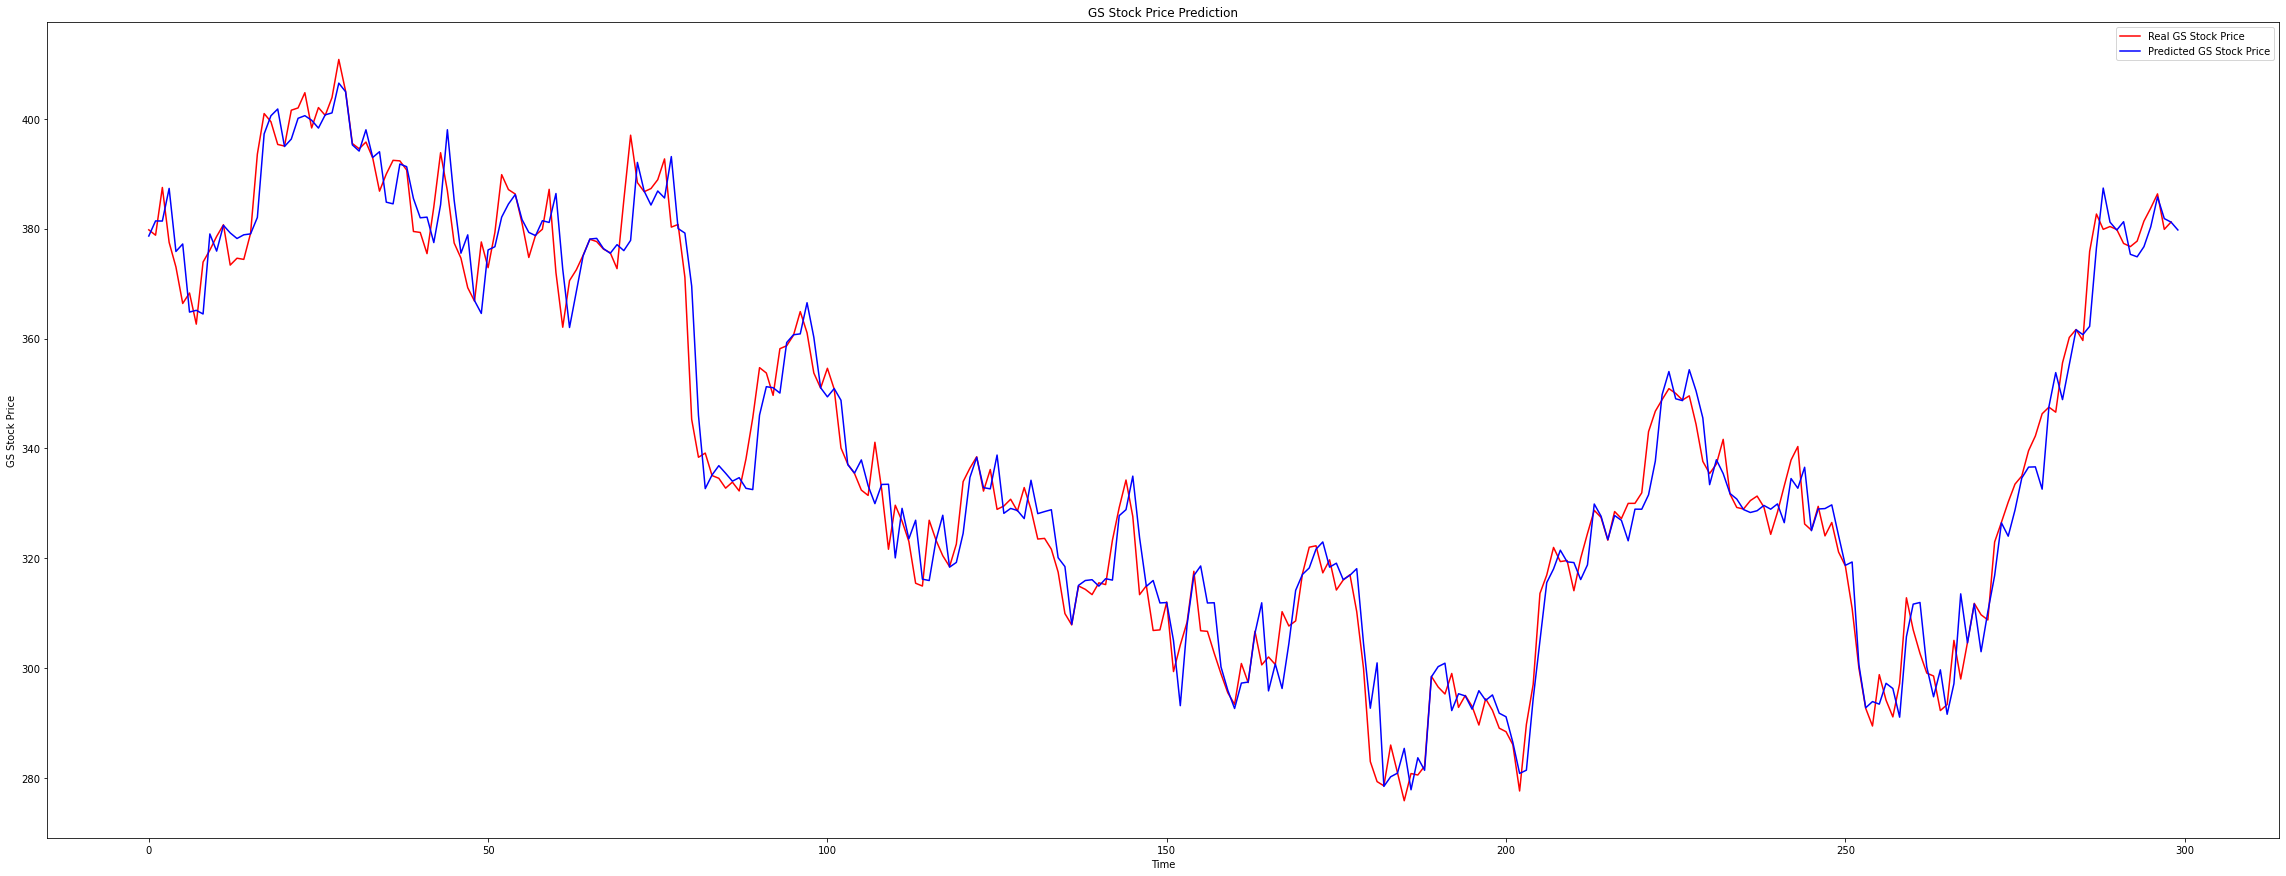

In [88]:
df = GS[['Adj Close']]
forecast_out = 1
monthPrevision = 10 * 30
df['prediction'] = df[['Adj Close']].shift(-forecast_out)
x = np.array(df.drop(['prediction'], 1))
x = x[:-forecast_out]
y = np.array(df['prediction'])
y = y[:-forecast_out]

#usiamo 30 mesi per il test e 80 per il train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.66)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", round(svm_confidence, 4))

#prendiamo gli ultimi 10 mesi per fare la previsione
x_mesi = np.array(df.drop(['prediction'], 1))[-monthPrevision:]
y_mesi = np.array(df.drop(['Adj Close'], 1))[-monthPrevision:]

#effettuiamo la previsione
svm_prediction = svr_rbf.predict(x_mesi)
plt.figure(figsize=(40,15))
plt.plot(y_mesi, color='red', label='Real GS Stock Price')
plt.plot(svm_prediction, color='blue', label='Predicted GS Stock Price')
plt.title('GS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GS Stock Price')
plt.legend()
plt.show()

# 4) Analisi tecnica

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style

Creazione di una strategia per segnali di acuisto o vendita basata sull'indicatore MACD

In [41]:
data = NFLX.drop(columns=['Open', 'High', 'Low',])
data['SMA20'] = data['Adj Close'].rolling(20).mean()
data['SMA120'] = data['Adj Close'].rolling(120).mean()
exp1 = data['Close'].ewm(span=12, adjust = False).mean()
exp2 = data['Close'].ewm(span=26, adjust = False).mean()
data['MACD'] = exp1 - exp2
data['Signal line'] = data['MACD'].ewm(span=9, adjust = False).mean()
data.dropna()

,Close,Adj Close,Volume,SMA20,SMA120,MACD,Signal line
Date,,,,,,,
2013-05-23,32.311428,32.311428,16198000,31.866357,23.005452,1.597750,1.704005
2013-05-24,32.677143,32.677143,11808300,31.960571,23.180488,1.483180,1.659840
2013-05-28,30.598572,30.598572,39525500,31.954714,23.345000,1.210704,1.570013
2013-05-29,30.762857,30.762857,34101900,31.949500,23.498202,0.996533,1.455317
2013-05-30,31.808571,31.808571,24087700,32.019143,23.664024,0.900798,1.344413
...,...,...,...,...,...,...,...
2022-11-22,286.690002,286.690002,6245100,284.253500,229.859334,9.156853,9.929149
2022-11-23,291.500000,291.500000,5919000,283.897501,230.630334,8.853569,9.714033
2022-11-25,285.540009,285.540009,3236000,283.327501,231.367001,8.039617,9.379150


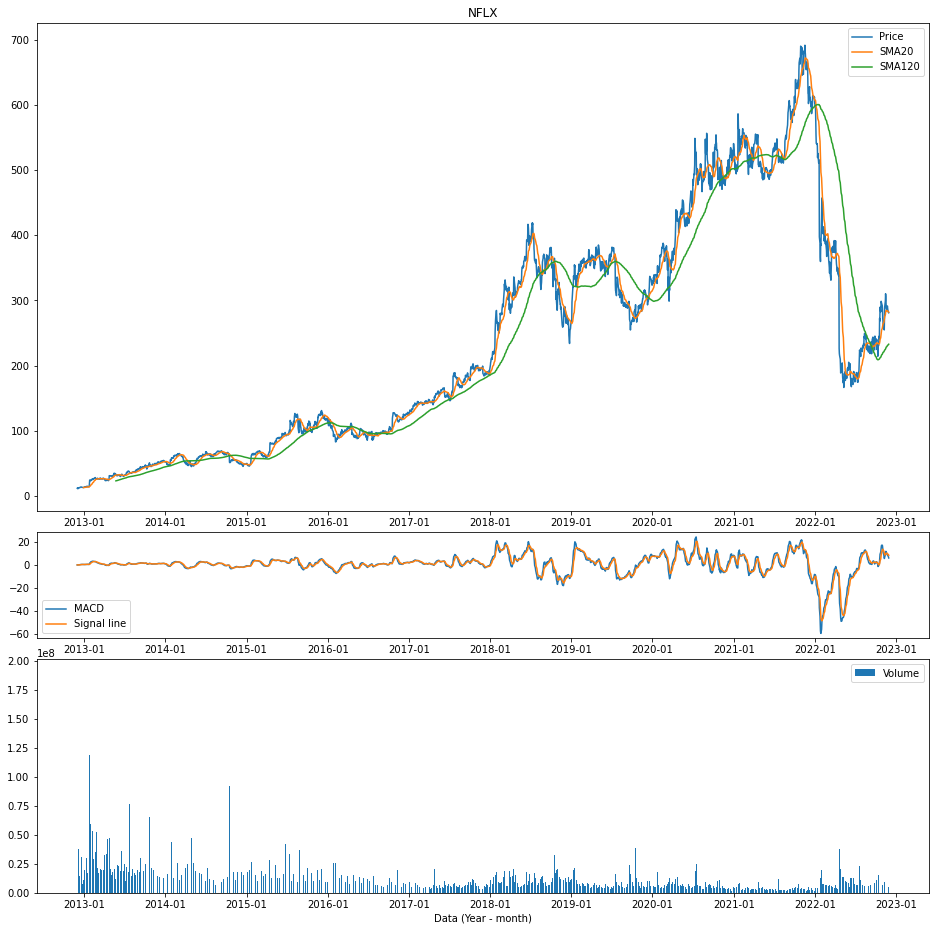

In [42]:
plt.figure(figsize=(16,16))
ax1 = plt.subplot2grid((7,1), (0,0), rowspan = 4, colspan = 1, title = 'NFLX')
ax2 = plt.subplot2grid((7,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((7,1), (4,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')

ax2.bar(data.index, data['Volume'], label = 'Volume')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.set_xlabel('Data (Year - month)')

ax3.plot(data['MACD'], label = 'MACD')
ax3.plot(data['Signal line'], label = 'Signal line')

ax1.legend()
ax2.legend()
ax3.legend()

In [43]:
data['Price_yesterday'] = data['Adj Close'].shift(1)
data['Change'] = data['Adj Close'] / data['Price_yesterday']

#segnale aquisto strategia SMA
data['Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                        else 0 for i in data.index]

#segnale acquisto strategia MACD
data['Invested_MACD'] = [1 if data.loc[i, 'MACD'] > data.loc[i, 'Signal line']
                        else 0 for i in data.index]
data = data.dropna()

#calcolo strategia SMA
sma = data[data['Invested_SMA'] == 1]
sma['Return'] = np.cumprod(sma['Change'])
sma['rtn'] =sma['Return'].pct_change()
sma['rtn'].std()*np.sqrt(252)
sma['rtn'].mean()*252 / (sma['rtn'].std()*np.sqrt(252))

#calcolo strategia MACD
macd = data[data['Invested_MACD'] == 1]
macd['Return'] = np.cumprod(macd['Change'])
macd['rtn'] =macd['Return'].pct_change()
macd['rtn'].std()*np.sqrt(252)
macd['rtn'].mean()*252 / (macd['rtn'].std()*np.sqrt(252))

/var/folders/1s/672m0_6n7h948fs62b4bq7wc0000gn/T/ipykernel_6235/2243807281.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
/var/folders/1s/672m0_6n7h948fs62b4bq7wc0000gn/T/ipykernel_6235/2243807281.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['rtn'] =sma['Return'].pct_change()
/var/folders/1s/672m0_6n7h948fs62b4bq7wc0000gn/T/ipykernel_6235/2243807281.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

2.8318780802237047

In [44]:
data['Buy_and_hold'] = np.cumprod(data['Change'])
data['rtn'] = data['Buy_and_hold'].pct_change()
data['rtn'].std()
data['rtn'].mean()*252 / (data['rtn'].std()*np.sqrt(252))

0.7343048394894256

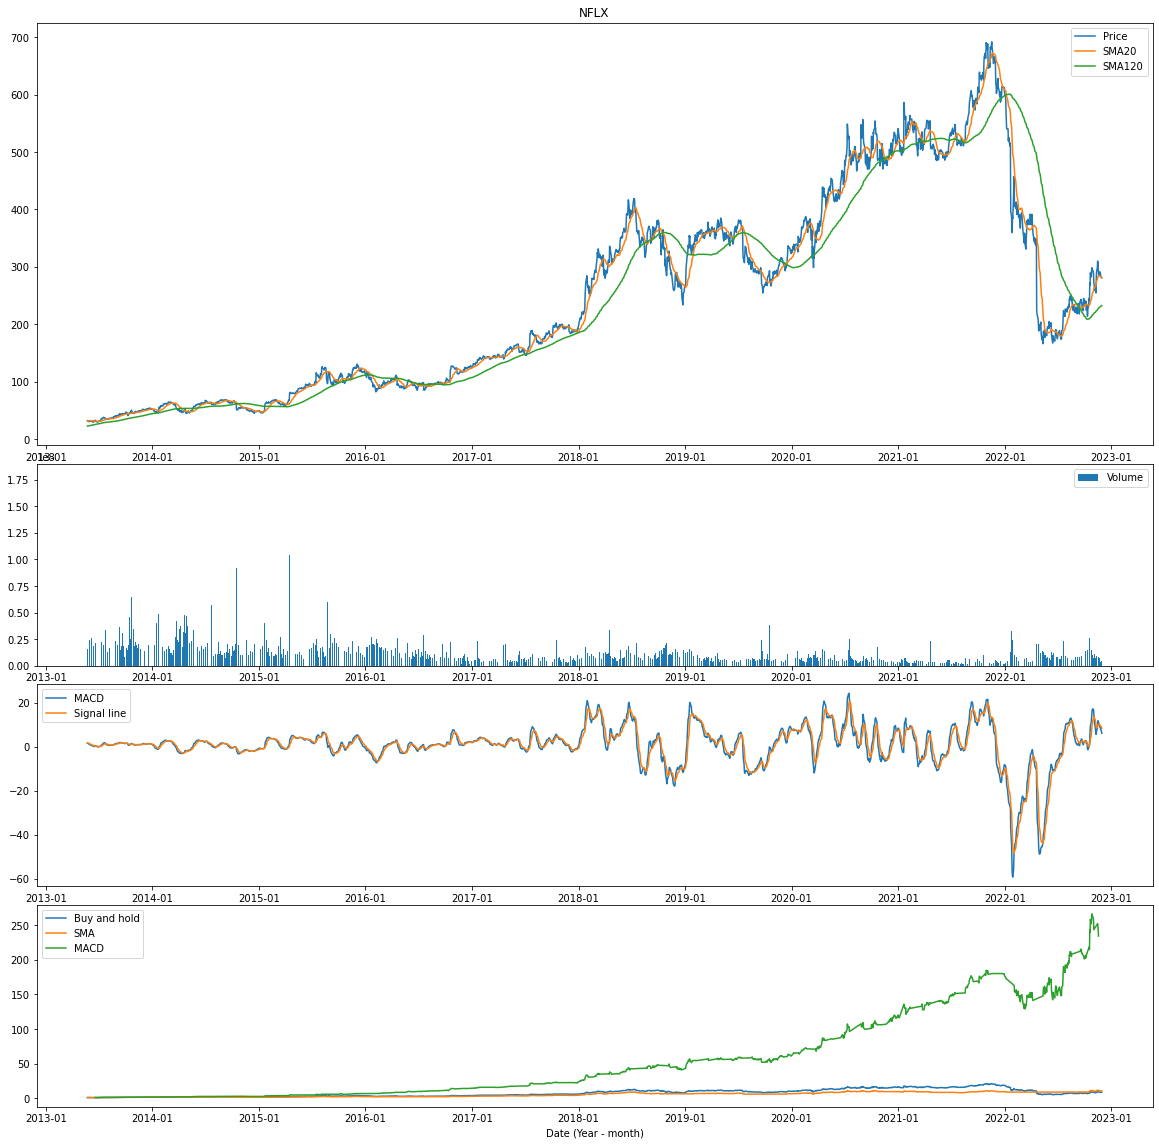

In [45]:
plt.figure(figsize=(20,24))
ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 4, colspan = 1, title = 'NFLX')
ax2 = plt.subplot2grid((12,1), (4,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((12,1), (6,0), rowspan = 2, colspan = 1, sharex = ax1)
ax4 = plt.subplot2grid((12,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)

ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')

ax2.bar(data.index, data['Volume'], label = 'Volume')

ax3.plot(data['MACD'], label = 'MACD')
ax3.plot(data['Signal line'], label = 'Signal line')

ax4.plot(data['Buy_and_hold'], label = 'Buy and hold')
ax4.plot(sma['Return'], label = 'SMA')
ax4.plot(macd['Return'], label = 'MACD')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax4.set_xlabel('Date (Year - month)')

ax1.legend()
ax2.legend()
ax4.legend()
ax3.legend()
plt.show()

# 5) CAPM

Calcoliamo il beta di ciascun titolo rispetto al mercato

In [46]:
import statsmodels.formula.api as smf

In [47]:
marketBenchmark = '^GSPC'
df = yf.download(['NFLX', 'META', 'GS', 'C', 'KO', 'PEP', marketBenchmark], start, end)

[*********************100%***********************]  7 of 7 completed


In [48]:
marketCloses = df['Adj Close']
x = marketCloses.pct_change().dropna()
x.head()

,C,GS,KO,META,NFLX,PEP,^GSPC
Date,,,,,,,
2012-12-03,-0.010124,0.005179,-0.014241,-0.034286,-0.069881,-0.004843,-0.004745
2012-12-04,0.002046,-0.015372,-0.006153,0.015532,0.140131,-0.000143,-0.001710
2012-12-05,0.063283,0.004718,0.004307,0.009104,-0.037853,0.005583,0.001585
2012-12-06,0.015360,0.000598,0.001876,-0.026705,0.033585,0.004447,0.003307
2012-12-07,0.016747,-0.005375,0.008828,0.019281,-0.002205,0.003428,0.002921


In [49]:
#NFLX and S&P500 Beta
NFLXMarket = pd.concat([x['NFLX'], x['^GSPC']], axis=1)
covNFLX = NFLXMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaNFLX = covNFLX/marketVariance
betaNFLX

1.1543459583242088

In [50]:
#META and S&P500 Beta
METAMarket = pd.concat([x['META'], x['^GSPC']], axis=1)
covMETA = METAMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaMETA = covMETA/marketVariance
betaMETA

1.2343847399308856

In [51]:
#GS and S&P500 Beta
GSMarket = pd.concat([x['GS'], x['^GSPC']], axis=1)
covGS = GSMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaGS = covGS/marketVariance
betaGS

1.2046512256268267

In [52]:
#C and S&P500 Beta
CMarket = pd.concat([x['C'], x['^GSPC']], axis=1)
covC = CMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaC = covC/marketVariance
betaC

1.3485966818355888

In [53]:
#KO and S&P500 Beta
KOMarket = pd.concat([x['KO'], x['^GSPC']], axis=1)
covKO = KOMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaKO = covKO/marketVariance
betaKO

0.6335211414101544

In [54]:
#PEP and S&P500 Beta
PEPMarket = pd.concat([x['PEP'], x['^GSPC']], axis=1)
covPEP = PEPMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaPEP = covPEP/marketVariance
betaPEP

0.6745461369054796

In [55]:
#Creiamo un DataFrame con i beta
beta = pd.DataFrame({'NFLX': betaNFLX, 'META': betaMETA, 'GS': betaGS, 'C': betaC, 'KO': betaKO, 'PEP': betaPEP}, index=['Beta'])
print(beta)

          NFLX      META        GS         C        KO       PEP
Beta  1.154346  1.234385  1.204651  1.348597  0.633521  0.674546


Ora procediamo con il calcolo del Fama French factor

In [56]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas_datareader as pdr
import statsmodels.formula.api as smf

In [58]:
factor_df = pdr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', start, end).read()[0]
factor_df.columns = ['mkt', 'smb', 'hml', 'rf']
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)
factor_df.index = factor_df.index.strftime('%Y-%m')
factor_df = factor_df.tail(-1)
print(factor_df.head().to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &     mkt &     smb &     hml &      rf \\
Date    &         &         &         &         \\
\midrule
2012-12 &  0.0118 &  0.0150 &  0.0351 &  0.0001 \\
2013-01 &  0.0557 &  0.0033 &  0.0096 &  0.0000 \\
2013-02 &  0.0129 & -0.0028 &  0.0011 &  0.0000 \\
2013-03 &  0.0403 &  0.0081 & -0.0019 &  0.0000 \\
2013-04 &  0.0155 & -0.0236 &  0.0045 &  0.0000 \\
\bottomrule
\end{tabular}



In [59]:
#NFLX Fama French risk exposure
y = NFLXm['Adj Close'].pct_change().dropna()

#sistemiamo i mesi, per farli combaciare
y = y.head(-1)

#sistemiamo le date allo stesso formato
y.index = y.index.strftime('%Y-%m')

#rinominiamo la colonna
y.name = 'rtn'

#uniamo i due dataframe
ff_data = factor_df.join(y)

#calcoliamo l'Excess Return
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

#effettuiamo la regressione
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()

print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     10.54
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           3.53e-06
Time:                        16:10:34   Log-Likelihood:                 77.670
No. Observations:                 119   AIC:                            -147.3
Df Residuals:                     115   BIC:                            -136.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0221      0.012      1.824      0.0

In [60]:
#META Fama French risk exposure
y = METAm['Adj Close'].pct_change().dropna()

#sistemiamo i mesi, per farli combaciare
y = y.head(-1)

#sistemiamo le date allo stesso formato
y.index = y.index.strftime('%Y-%m')

#rinominiamo la colonna
y.name = 'rtn'

#uniamo i due dataframe
ff_data = factor_df.join(y)

#calcoliamo l'Excess Return
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

#effettuiamo la regressione
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()

print(ff_model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &   excess\_rtn    & \textbf{  R-squared:         } &     0.243   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.223   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     12.30   \\
\textbf{Date:}             & Wed, 28 Dec 2022 & \textbf{  Prob (F-statistic):} &  4.90e-07   \\
\textbf{Time:}             &     16:10:34     & \textbf{  Log-Likelihood:    } &    120.19   \\
\textbf{No. Observations:} &         119      & \textbf{  AIC:               } &    -232.4   \\
\textbf{Df Residuals:}     &         115      & \textbf{  BIC:               } &    -221.3   \\
\textbf{Df Model:}         &           3      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                   & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midru

In [61]:
#GS Fama French risk exposure
y = GSm['Adj Close'].pct_change().dropna()

#sistemiamo i mesi, per farli combaciare
y = y.head(-1)

#sistemiamo le date allo stesso formato
y.index = y.index.strftime('%Y-%m')

#rinominiamo la colonna
y.name = 'rtn'

#uniamo i due dataframe
ff_data = factor_df.join(y)

#calcoliamo l'Excess Return
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

#effettuiamo la regressione
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()

print(ff_model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &   excess\_rtn    & \textbf{  R-squared:         } &     0.676   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.667   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     79.93   \\
\textbf{Date:}             & Wed, 28 Dec 2022 & \textbf{  Prob (F-statistic):} &  5.23e-28   \\
\textbf{Time:}             &     16:10:34     & \textbf{  Log-Likelihood:    } &    199.72   \\
\textbf{No. Observations:} &         119      & \textbf{  AIC:               } &    -391.4   \\
\textbf{Df Residuals:}     &         115      & \textbf{  BIC:               } &    -380.3   \\
\textbf{Df Model:}         &           3      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                   & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midru

In [62]:
#C Fama French risk exposure
y = Cm['Adj Close'].pct_change().dropna()

#sistemiamo i mesi, per farli combaciare
y = y.head(-1)

#sistemiamo le date allo stesso formato
y.index = y.index.strftime('%Y-%m')

#rinominiamo la colonna
y.name = 'rtn'

#uniamo i due dataframe
ff_data = factor_df.join(y)

#calcoliamo l'Excess Return
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

#effettuiamo la regressione
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()

print(ff_model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &   excess\_rtn    & \textbf{  R-squared:         } &     0.724   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.717   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     100.5   \\
\textbf{Date:}             & Wed, 28 Dec 2022 & \textbf{  Prob (F-statistic):} &  5.32e-32   \\
\textbf{Time:}             &     16:10:34     & \textbf{  Log-Likelihood:    } &    194.52   \\
\textbf{No. Observations:} &         119      & \textbf{  AIC:               } &    -381.0   \\
\textbf{Df Residuals:}     &         115      & \textbf{  BIC:               } &    -369.9   \\
\textbf{Df Model:}         &           3      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                   & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midru

In [63]:
#KO Fama French risk exposure
y = KOm['Adj Close'].pct_change().dropna()

#sistemiamo i mesi, per farli combaciare
y = y.head(-1)

#sistemiamo le date allo stesso formato
y.index = y.index.strftime('%Y-%m')

#rinominiamo la colonna
y.name = 'rtn'

#uniamo i due dataframe
ff_data = factor_df.join(y)

#calcoliamo l'Excess Return
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

#effettuiamo la regressione
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()

print(ff_model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &   excess\_rtn    & \textbf{  R-squared:         } &     0.434   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.419   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     29.37   \\
\textbf{Date:}             & Wed, 28 Dec 2022 & \textbf{  Prob (F-statistic):} &  3.57e-14   \\
\textbf{Time:}             &     16:10:34     & \textbf{  Log-Likelihood:    } &    231.66   \\
\textbf{No. Observations:} &         119      & \textbf{  AIC:               } &    -455.3   \\
\textbf{Df Residuals:}     &         115      & \textbf{  BIC:               } &    -444.2   \\
\textbf{Df Model:}         &           3      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                   & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midru

In [64]:
#PEP Fama French risk exposure
y = PEPm['Adj Close'].pct_change().dropna()

#sistemiamo i mesi, per farli combaciare
y = y.head(-1)

#sistemiamo le date allo stesso formato
y.index = y.index.strftime('%Y-%m')

#rinominiamo la colonna
y.name = 'rtn'

#uniamo i due dataframe
ff_data = factor_df.join(y)

#calcoliamo l'Excess Return
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

#effettuiamo la regressione
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()

print(ff_model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &   excess\_rtn    & \textbf{  R-squared:         } &     0.441   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.427   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     30.27   \\
\textbf{Date:}             & Wed, 28 Dec 2022 & \textbf{  Prob (F-statistic):} &  1.69e-14   \\
\textbf{Time:}             &     16:10:35     & \textbf{  Log-Likelihood:    } &    243.18   \\
\textbf{No. Observations:} &         119      & \textbf{  AIC:               } &    -478.4   \\
\textbf{Df Residuals:}     &         115      & \textbf{  BIC:               } &    -467.2   \\
\textbf{Df Model:}         &           3      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                   & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midru

# 6) Costruzione portafoglio

Calcolo con simulazione Monte Carlo

In [65]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
prices_df = yf.download(["NFLX","META", "GS", "C", "KO", "PEP"], start, end, adjusted=True)
returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

[*********************100%***********************]  6 of 6 completed


Calculate annualized average returns and the corresponding standard deviation:

In [66]:
returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS


Simulate random portfolio weights:

In [67]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, 6))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

Calculate the portfolio metrics:

In [68]:
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

Create a DataFrame containing all the data:

In [69]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 'volatility': portf_vol, 'sharpe_ratio': portf_sharpe_ratio})

Locate the points creating the Efficient Frontier:

In [70]:
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []
portf_rtns_ef = np.linspace(portf_results_df.returns.min(), portf_results_df.returns.max(), N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)
for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

Plot the Efficient Frontier:

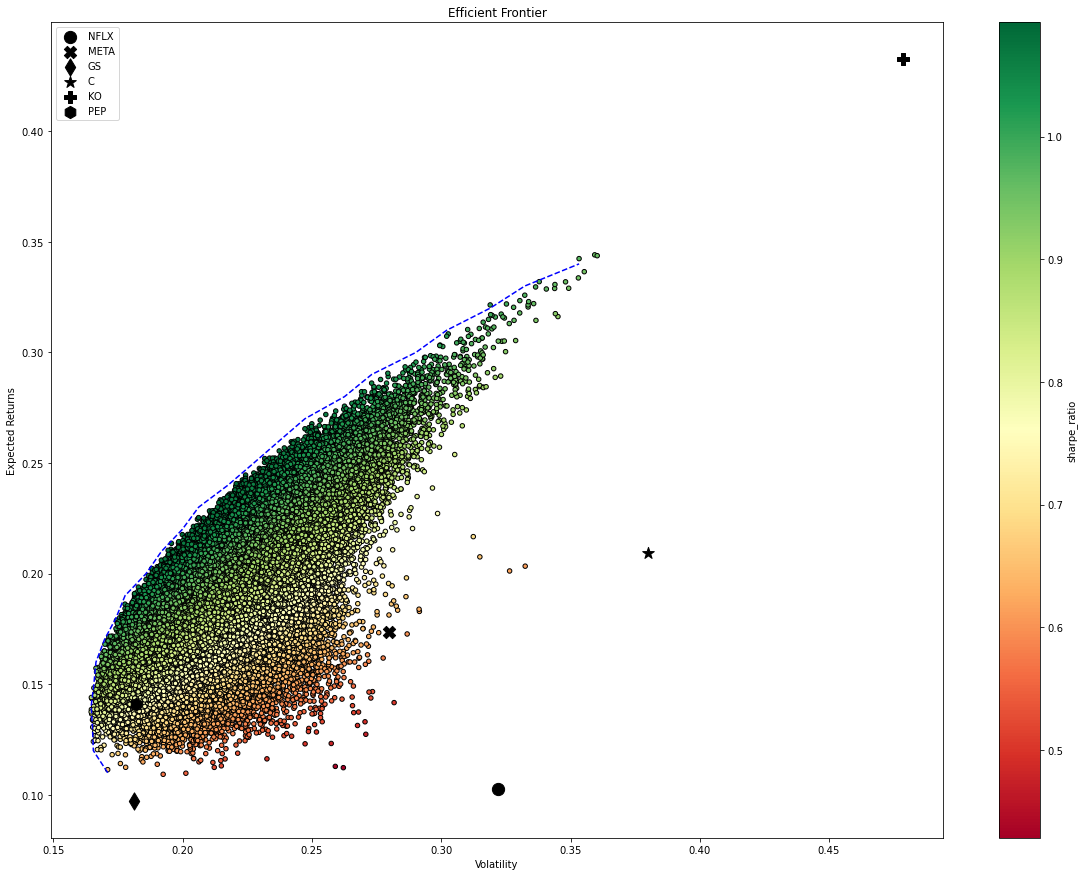

In [71]:
RISKY_ASSETS = ['NFLX', 'META', 'GS', 'C', 'KO', 'PEP']
n_assets = len(RISKY_ASSETS)
MARKS = ['o', 'X', 'd', '*', 'P', 'h']

fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', cmap='RdYlGn', edgecolors='black', ax=ax)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), y=avg_returns[asset_index], marker=MARKS[asset_index], s=150, color='black', label=RISKY_ASSETS[asset_index])
ax.legend()

In [72]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]
min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [73]:
print('Maximum Sharpe ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe ratio portfolio ----
Performance
returns: 22.53% volatility: 20.61% sharpe_ratio: 109.30% 
Weights
NFLX: 0.61% META: 15.44% GS: 7.14% C: 5.23% KO: 27.08% PEP: 44.50% 

In [74]:
print('Minimum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
returns: 13.75% volatility: 16.46% sharpe_ratio: 83.54% 
Weights
NFLX: 2.28% META: 2.40% GS: 44.51% C: 3.89% KO: 4.54% PEP: 42.38% 

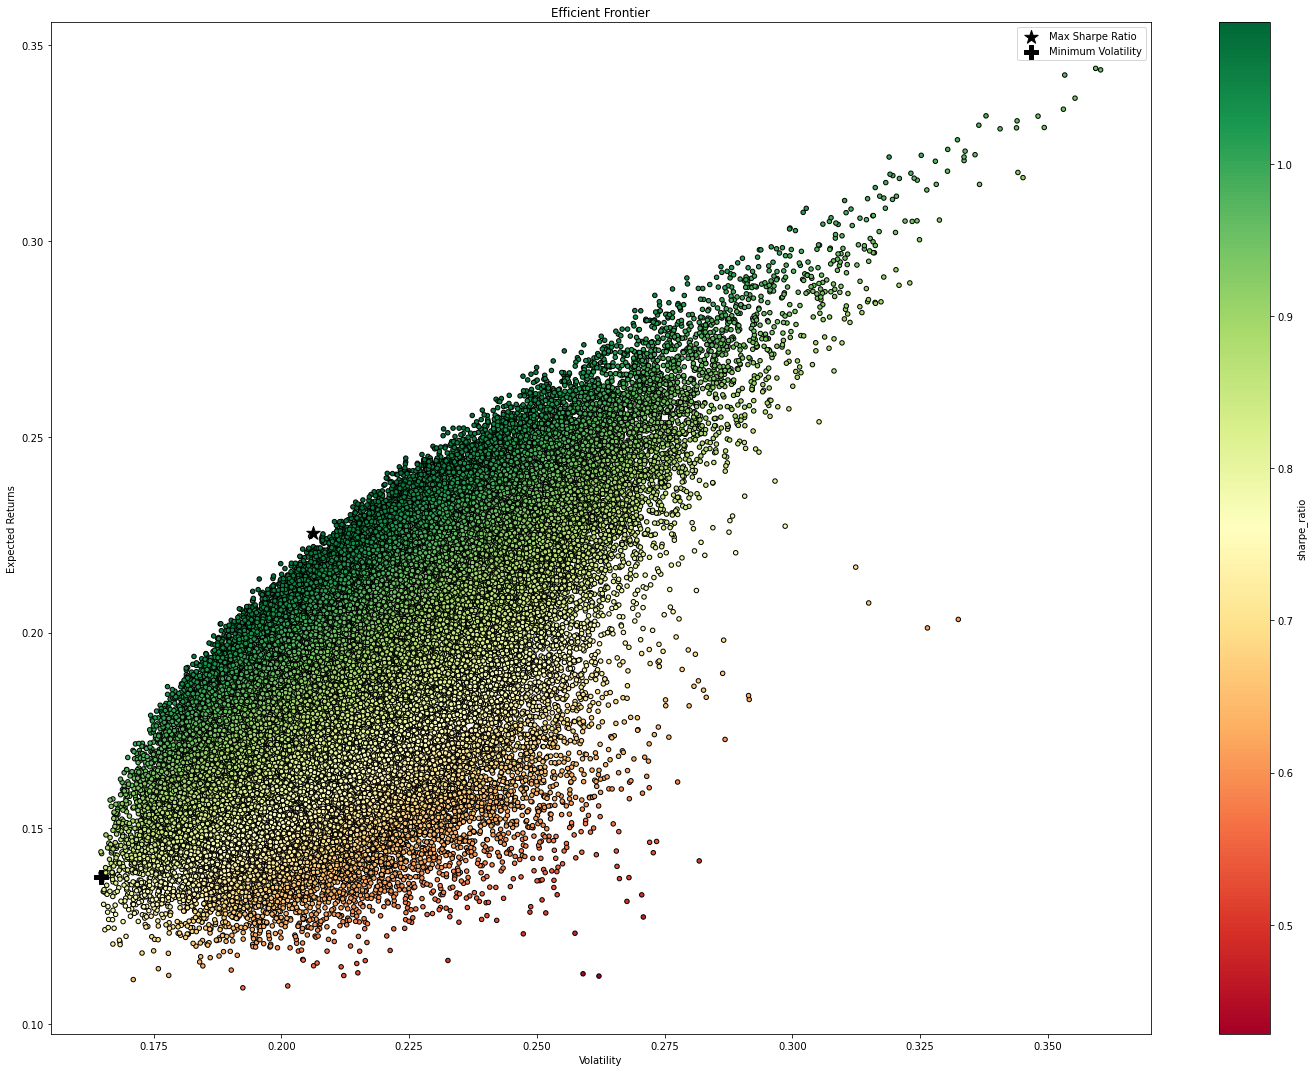

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, 
           y=max_sharpe_portf.returns, 
           c='black', marker='*', 
           s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, 
           y=min_vol_portf.returns, 
           c='black', marker='P', 
           s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

plt.tight_layout()

plt.show()

Ottimizzazione per avversione al rischio

In [76]:
pip install cvxpy

Note: you may need to restart the kernel to use updated packages.


In [77]:
import cvxpy as cp

In [78]:
avg_returns = avg_returns.values
cov_mat = cov_mat.values

In [79]:
weights = cp.Variable(n_assets)
gamma = cp.Parameter(nonneg=True)
portf_rtn_cvx = avg_returns * weights 
portf_vol_cvx = cp.quad_form(weights, cov_mat)
objective_function = cp.Maximize(portf_rtn_cvx - gamma * portf_vol_cvx)
problem = cp.Problem(objective_function, 
                     [cp.sum(weights) == 1, weights >= 0])

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


In [91]:
N_POINTS = 25
portf_rtn_cvx_ef = np.zeros(N_POINTS)
portf_vol_cvx_ef = np.zeros(N_POINTS)
weights_ef = []
gamma_range = np.logspace(-3, 3, num=N_POINTS)

for i in range(N_POINTS):
    gamma.value = gamma_range[i]
    problem.solve()
    portf_vol_cvx_ef[i] = cp.sqrt(portf_vol_cvx).value
    portf_rtn_cvx_ef[i] = portf_rtn_cvx.value
    weights_ef.append(weights.value)

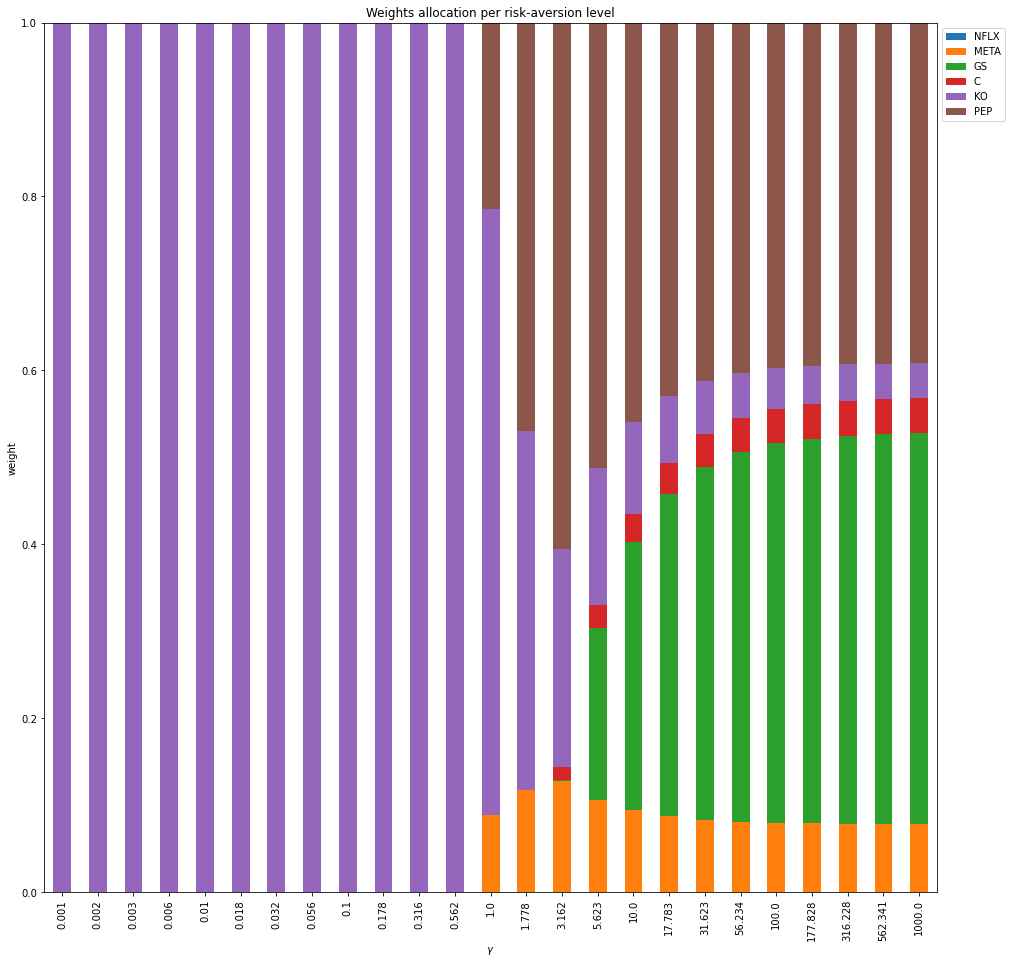

In [93]:
weights_df = pd.DataFrame(weights_ef, 
                          columns=RISKY_ASSETS, 
                          index=np.round(gamma_range, 3))
ax = weights_df.plot(kind='bar', stacked=True) 
ax.set(title='Weights allocation per risk-aversion level',
       xlabel=r'$\gamma$', 
       ylabel='weight')
ax.legend(bbox_to_anchor=(1,1))

#plt.tight_layout()
ax.figure.set_size_inches(16, 16)

plt.show()